In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import precision_recall_curve

In [2]:
# data gathering
x_train = pd.read_csv('../pca/pca_data/AUS_WITH_WEATHER_2022_Categorical_X_train_pca.csv', sep=',', encoding='utf-8')
x_test = pd.read_csv('../pca/pca_data/AUS_WITH_WEATHER_2022_Categorical_X_test_pca.csv', sep=',', encoding='utf-8')

y_train = x_train['DEP_DEL15']
x_train = x_train.drop(['DEP_DEL15'], axis=1)
x_train = x_train.drop(['DEP_DELAY'], axis=1)
# x_train = x_train.drop(['DEP_TIME'], axis=1)
# x_train = x_train.drop(['DEP_DELAY_GROUP'], axis=1)
x_train = x_train.drop(['Unnamed: 0'], axis=1)
# x_train = x_train.drop(['ARR_DEL15'], axis=1)
# x_train = x_train.drop(['ARR_DELAY'], axis=1)
# x_train = x_train.drop(['ARR_TIME'], axis=1)
# x_train = x_train.drop(['ARR_DELAY_GROUP'], axis=1)

y_test = x_test['DEP_DEL15']
x_test = x_test.drop(['DEP_DEL15'], axis=1)
x_test = x_test.drop(['DEP_DELAY'], axis=1)
# x_test = x_test.drop(['DEP_TIME'], axis=1)
# x_test = x_test.drop(['DEP_DELAY_GROUP'], axis=1)
x_test = x_test.drop(['Unnamed: 0'], axis=1)
# x_test = x_test.drop(['ARR_DEL15'], axis=1)
# x_test = x_test.drop(['ARR_DELAY'], axis=1)
# x_test = x_test.drop(['ARR_TIME'], axis=1)
# x_test = x_test.drop(['ARR_DELAY_GROUP'], axis=1)

x_train = x_train.iloc[:, : 20]
x_test = x_test.iloc[:, : 20]

print(x_train.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19'],
      dtype='object')


Accuracy: 0.7674632776166137
[0.23355798 0.12896406 0.12896406 ... 0.15817223 0.08132261 0.19883172]


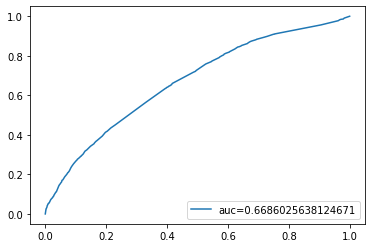

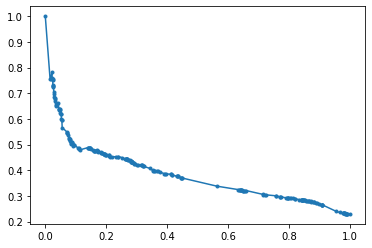

[[15914   808]
 [ 4242   753]]


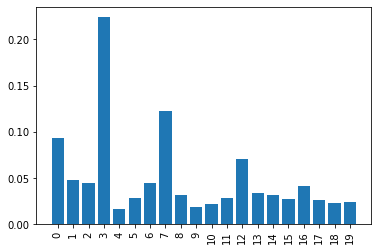

In [3]:
# Trees

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=10, min_samples_split=10)
clf.fit(x_train, y_train)
tree_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, tree_pred))
tree_pred_proba = clf.predict_proba(x_test)[::,1]
print(tree_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  tree_pred_proba)
auc = roc_auc_score(y_test, tree_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, tree_pred_proba)
plt.plot(recall, precision, marker='.')
plt.show()

print(confusion_matrix(y_test, tree_pred))
plt.bar(clf.feature_names_in_, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

Accuracy: 0.770548418289819
[0.29358016 0.0970531  0.08105789 ... 0.14639231 0.17467993 0.11688591]


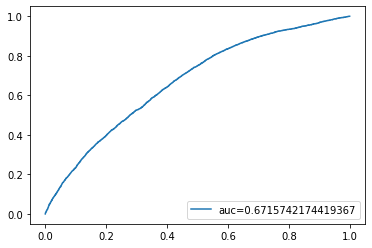

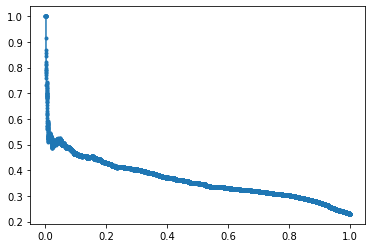

[[16638    84]
 [ 4899    96]]


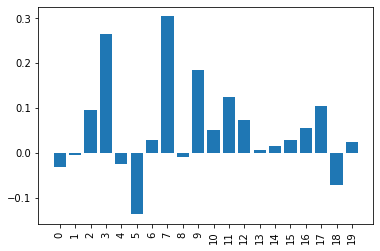

In [4]:
# Logistic Regression

clf = LogisticRegression(random_state=42, max_iter=1000, C=2, penalty='l2')
clf.fit(x_train, y_train)
log_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, log_pred))
log_pred_proba = clf.predict_proba(x_test)[::,1]
print(log_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  log_pred_proba)
auc = roc_auc_score(y_test, log_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, log_pred_proba)
plt.plot(recall, precision, marker='.')
plt.show()

print(confusion_matrix(y_test, log_pred))
plt.bar(clf.feature_names_in_, clf.coef_[0])
plt.xticks(rotation=90)
plt.show()

Accuracy: 0.7833034028641157
[0.23757123 0.1217046  0.22863008 ... 0.23719545 0.22705776 0.06436427]


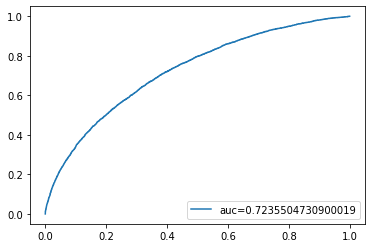

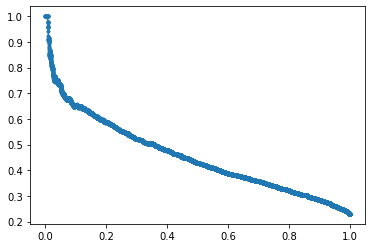

[[15900   822]
 [ 3884  1111]]


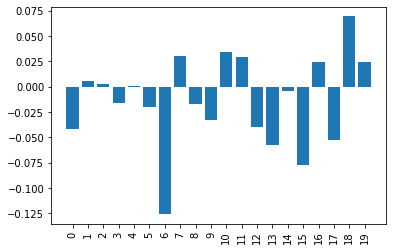

In [6]:
# MLP

# clf = MLPClassifier(random_state=42).fit(x_train, y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# y_pred_proba = clf.predict_proba(X_test)[::,1]
# print(y_pred_proba)
# fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
# auc = roc_auc_score(y_test, y_pred_proba)
# plt.plot(fpr,tpr,label="auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

# print(confusion_matrix(y_test, y_pred))
# print(clf.coefs_)
# print(clf.n_layers_)
# print(clf.feature_names_in_)
# plt.bar(clf.feature_names_in_, clf.coefs_[0].mean(axis=1))
# plt.xticks(rotation=90)
# plt.show()

clf = MLPClassifier(random_state=42)
clf.fit(x_train, y_train)
mlp_pred = clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, mlp_pred))
mlp_pred_proba = clf.predict_proba(x_test)[::,1]
print(mlp_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  mlp_pred_proba)
auc = roc_auc_score(y_test, mlp_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, mlp_pred_proba)
plt.plot(recall, precision, marker='.')
plt.show()

print(confusion_matrix(y_test, mlp_pred))
plt.bar(clf.feature_names_in_, clf.coefs_[0].mean(axis=1))
plt.xticks(rotation=90)
plt.show()

Accuracy: 0.7765805590090712
[0.55673575 0.02512208 0.13905199 ... 0.03876491 0.08485245 0.02726472]


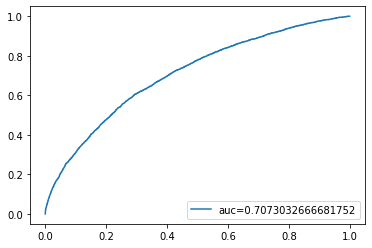

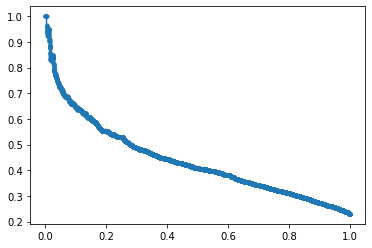

[[15695  1027]
 [ 3825  1170]]


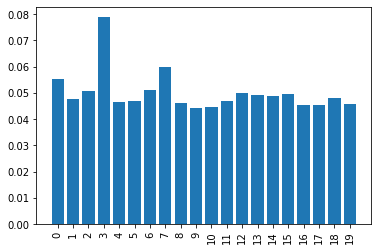

In [7]:
# XGBoost

import xgboost

clf = xgboost.XGBClassifier(random_state=42, max_depth=13)

clf.fit(x_train, y_train)
xgb_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, xgb_pred))
xgb_pred_proba = clf.predict_proba(x_test)[::,1]
print(xgb_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  xgb_pred_proba)
auc = roc_auc_score(y_test, xgb_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, xgb_pred_proba)
plt.plot(recall, precision, marker='.')
plt.show()

print(confusion_matrix(y_test, xgb_pred))
plt.bar(clf.feature_names_in_, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

Learning rate set to 0.061302
0:	learn: 0.6700835	total: 174ms	remaining: 2m 53s
1:	learn: 0.6500664	total: 188ms	remaining: 1m 33s
2:	learn: 0.6322721	total: 202ms	remaining: 1m 7s
3:	learn: 0.6168167	total: 215ms	remaining: 53.6s
4:	learn: 0.6035531	total: 231ms	remaining: 46.1s
5:	learn: 0.5921365	total: 252ms	remaining: 41.7s
6:	learn: 0.5822364	total: 273ms	remaining: 38.7s
7:	learn: 0.5732371	total: 290ms	remaining: 36s
8:	learn: 0.5660045	total: 308ms	remaining: 33.9s
9:	learn: 0.5588716	total: 327ms	remaining: 32.3s
10:	learn: 0.5526254	total: 343ms	remaining: 30.8s
11:	learn: 0.5471376	total: 361ms	remaining: 29.7s
12:	learn: 0.5421519	total: 380ms	remaining: 28.8s
13:	learn: 0.5381502	total: 399ms	remaining: 28.1s
14:	learn: 0.5345085	total: 418ms	remaining: 27.4s
15:	learn: 0.5313093	total: 444ms	remaining: 27.3s
16:	learn: 0.5282791	total: 468ms	remaining: 27.1s
17:	learn: 0.5258929	total: 489ms	remaining: 26.7s
18:	learn: 0.5237422	total: 508ms	remaining: 26.2s
19:	learn: 

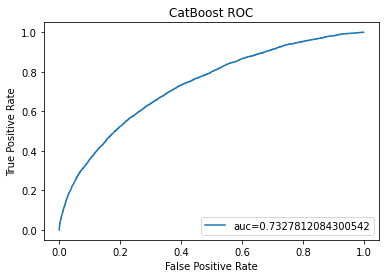

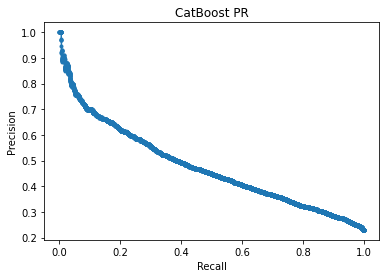

PR AUC: 0.476399533526056
[[16226   496]
 [ 4099   896]]


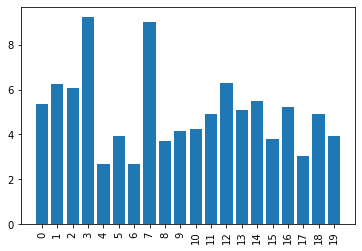

In [5]:
# Catboost
import sklearn.metrics as metrics
clf = CatBoostClassifier(random_state=42, loss_function='Logloss')
clf.fit(x_train, y_train)
cat_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, cat_pred))
cat_pred_proba = clf.predict_proba(x_test)[::,1]
print(cat_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  cat_pred_proba)
auc = roc_auc_score(y_test, cat_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title("CatBoost ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, cat_pred_proba)
plt.plot(recall, precision, marker='.')
plt.title("CatBoost PR")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
print("PR AUC:", metrics.average_precision_score(y_test, cat_pred_proba))

print(confusion_matrix(y_test, cat_pred))

importance = clf.get_feature_importance()
plt.bar(x_train.columns, importance)
plt.xticks(rotation=90)
plt.show()

In [10]:
# create dataframe with all predicted values
df = pd.DataFrame({'Actual': y_test, 'Tree': tree_pred, 'Logistic': log_pred, 'MLP': mlp_pred, 'XGBoost': xgb_pred, 'CatBoost': cat_pred})
df.to_csv('PCA_Classification_Results.csv', index=False)